### This script contains the following points:

#### 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data
#### 2. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column
#### 3. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column
#### 4. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day
#### 5. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
#### 6. Explore whether there’s a connection between age and spending power (income) using a scatterplot
#### 7. Export your visualizations as “.png” files in your relevant project folder

# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Tell Python to remember a main folder path
path = r'C:\Users\Frederick\Documents\CareerFoundry\CF - Data Analytics Immersion\Achievement4\04-2024 Instacart Basket Analysis'

In [3]:
# Import most up-to-date project data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# 2. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

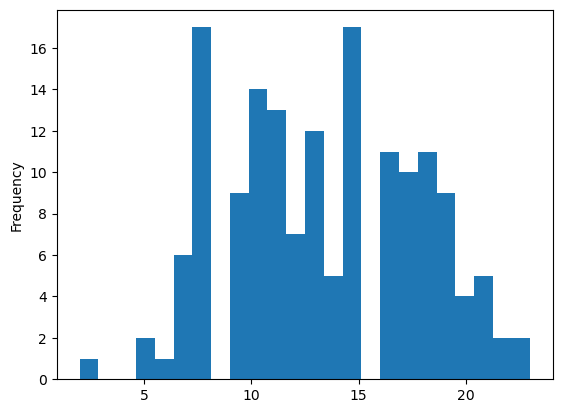

In [4]:
hist = instacart['order_hour_of_day'].plot.hist(bins = 24)

The histogram exhibits peaks during certain hours, which would indicate the times of day when the most orders are placed. If this peak occurs during midday or early evening, it might suggest that customers prefer to shop during their lunch hours or after work. The shape of the distribution could tell us if the ordering pattern is concentrated within a specific part of the day or if it is relatively uniform. A normal distribution might suggest a consistent shopping pattern centered around a particular time, while a skewed distribution could indicate a tendency to shop during specific times, like afternoons or evenings.

# 3. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

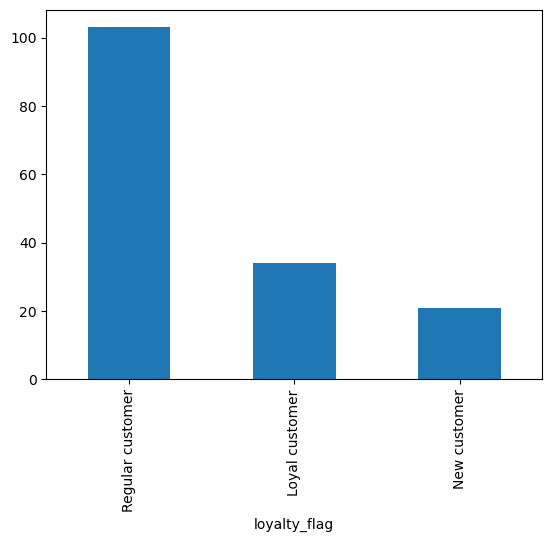

In [5]:
bar = instacart['loyalty_flag'].value_counts().plot.bar()

# 4. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [6]:
# Create a random sample by generating a seed
np.random.seed(4)

In [7]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(instacart)) <= 0.7

In [8]:
# Split the dataframe into two samples
big = instacart[dev]
small = instacart[~dev]

In [9]:
# Compare the dataframe length to the sum of the big and small samples
len(instacart)

158

In [10]:
len(big) + len(small)

158

In [11]:
# Reduce the samples to only the columns needed
instacart_2 = small [['order_hour_of_day','prices']]

In [12]:
# Check if the subset of the sample was made properly
instacart_2.head(5)

,order_hour_of_day,prices
0,13,5.8
2,16,5.8
3,17,5.8
6,17,5.8
10,21,5.8


C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


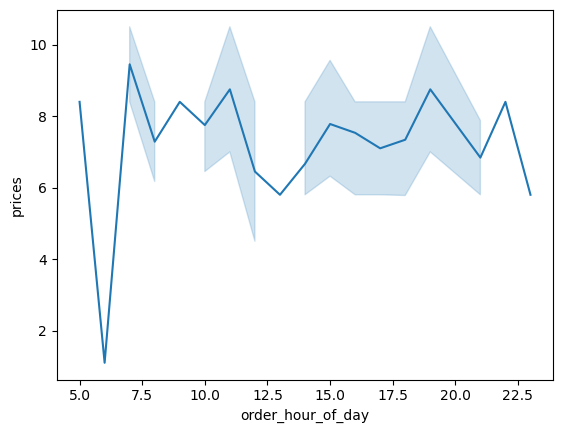

In [13]:
# Create a line chart
line = sns.lineplot(data = instacart_2, x = 'order_hour_of_day',y = 'prices')

# 5. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [14]:
# Reduce previously made sample to only the columns needed
instacart_3 = small [['age','n_dependants']]

In [15]:
# Check if the subset of the sample was made properly
instacart_3.head(5)

,age,n_dependants
0,67,3
2,18,3
3,60,1
6,58,1
10,58,1


C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


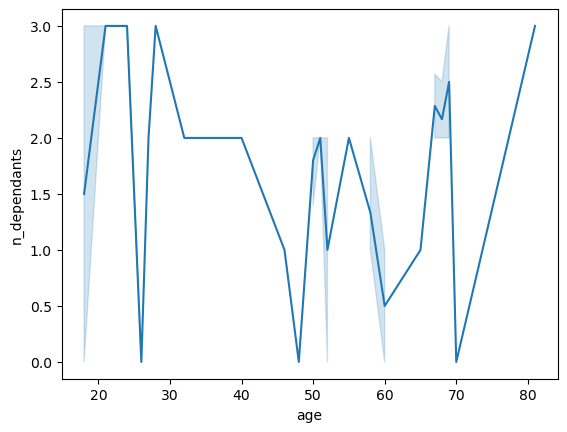

In [16]:
# Create a line chart
line_2 = sns.lineplot(data = instacart_3, x = 'age',y = 'n_dependants')

There are no clear patterns that would indicate a strong relationship between age and the number of dependents; for example, the line does not consistently go up or down as age increases.

# 6. Explore whether there’s a connection between age and spending power (income) using a scatterplot

In [17]:
# Reduce previously made sample to only the columns needed
instacart_4 = small [['age','income']]

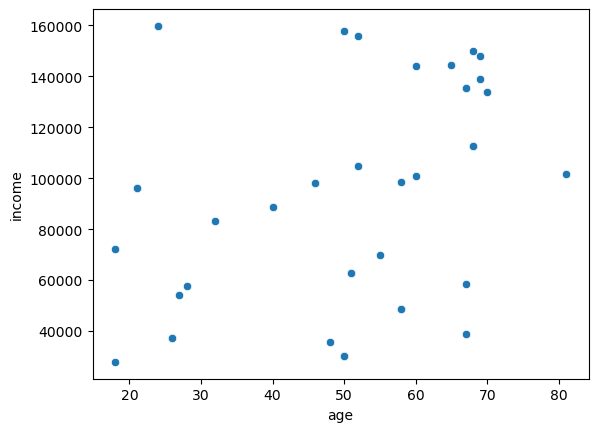

In [18]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = instacart_4)

Starting from around age 40 and onwards, there appears to be an upward trend in income, with many of the data points concentrated in the higher income brackets. This could suggest that income increases with age. The densest concentration of points for individuals over 40 is significantly higher on the income scale compared to those under 40, which could indicate that the median income increases with age. The scatterplot provides a visual representation that can hint at certain trends, like potential increases in income with age, but it would require statistical analysis to confirm any correlations or to understand the nuances of the relationship between age and income among the customers.

# 7. Export your visualizations as “.png” files in your relevant project folder

In [19]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [20]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [21]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))

In [22]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_n_dependants.png'))

In [23]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_spending_power_over_age.png'))